<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC2</p>
<p style="margin: 0; text-align:right;">2017-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimàdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 2: Mètodes no supervisats

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques no supervisades
així com algunes de les seves aplicacions reals:

 1. **Clustering clàssio**: k-means i la regla del colze.
 - **Més enllá de k-means**: clustering jeràrquic.
 - **Reducció de dimensionalitat**: PCA i t-SNE.
 - **Aplicacions**:
     - Compressió d'imatges.
     - Segmentació d'imatges de satèl·lit.
   
Per a això necessitarem les següents llibreries:

In [1]:
import random

import numpy as np
import pandas as pd
from sklearn import cluster      # Algorismes de clustering.
from sklearn import datasets     # Crear datasets.

# Visualizacio.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Clustering clàssic: k-means i la regla del colze (2 punts)

Anem a generar un dataset compost per $n$ núvols de punts, on $n$ serà un nombre aleatori entre 2 i 4, usant el mòdul ```datasets``` de scikit-learn.

Hi ha 1500 punts en 2 dimensions (repartits en 3 clusters)


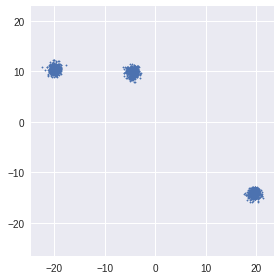

In [2]:
N_SAMPLES = 1500
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4
X, y = datasets.make_blobs(n_samples=N_SAMPLES, # Nombre de punts
                           n_features=2,        # Nombre de dimensions
                           centers=random.randint(MIN_CLUSTERS, MAX_CLUSTERS),
                           center_box=(-20, 20),
                           cluster_std=.6)
print('Hi ha {} punts en {} dimensions (repartits en {} clusters)'.format(X.shape[0], X.shape[1], y.max() + 1))
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(X[:,0], X[:,1], s=2)
ax.axis('equal')
plt.tight_layout()

Una tècnica per estimar $k$ és, com s'explica a la teoria:
> Els criteris anteriors (minimització de distàncies intra grup o maximització de distàncies inter grup) poden usar-se per establir un valor adequat per al paràmetre k. Valors k per als quals ja no s'aconsegueixen millores significatives en l'homogeneïtat interna dels segments o l'heterogeneïtat entre segments diferents, haurien de descartar-se.

El que popularment es coneix com *regla del colze*.

Primer cal calcular la suma dels errors quadràtics ([*SSE*](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)) que consisteix en la suma de tots els errors (distància de cada punt al seu centroide assignat) al quadrat.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

On $K$ és el nombre de clusters a buscar per *k-means*, $x \in C_i$ són els punts que pertanyen al i-èsim cluster, $c_i$ és el centroide del cluster $C_i$ (al qual pertanty el punt $x$), i $euclidean$ és la [distància euclídea](https://en.wikipedia.org/wiki/Euclidean_distance).

Aquest procediment realitzat per a cada possible valor $k$, resulta en una funció monòtona decreixent, on l'eix $x$ representa els diferents valors de $k$, i l'eix $y$ el $SSE$. Intuïtivament es podrà observar un significatiu descens de l'error, que indicarà el valor idoni de $k$.

**Es demana realitzar la representació gràfica de la regla del colze al costat de la seva interpretació, utilitzant la llibreria ```matplotlib``` i la implementació en scikit-learn de [*k-means*](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> càlcul i visualització de la regla del colze.  
</div>

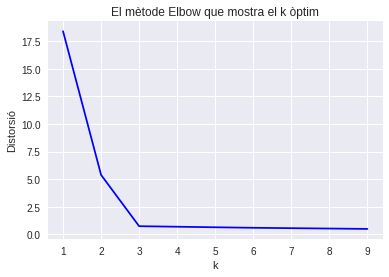

In [3]:
# afegiu aquesta biblioteca per calcular les distàncies
from scipy.spatial.distance import cdist

# crea una nova trama i dades
plt.plot()
dataset = np.array(list(zip(X[:,0], X[:,1]))).reshape(len(X[:,0]), 2)

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(dataset)
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])
    
# Traçar el colze
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsió')
plt.title('El mètode Elbow que mostra el k òptim')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Què s'interpreta en la gràfica? Com podria millorar-se l'elecció de $k$?  
</div>

Pel que fa a la regla del colze ens indica d'una forma gràfica les agrupacions K, calculem l'error quadràtic d'aquestes i les representem en gràfic, on podem veure que a partir de certa K l'error no disminueix significativament. Com podem veure en aquest cas quan K=3, l'error quadràtic es normalitza no disminueix més.

HI ha altres mètodes, no sols l'error quadràtic per obtenir un número d'agrupacions òptims, com el cas de la suma de les distàncies, que també hem realitzat i el resultat és el mateix k=3.


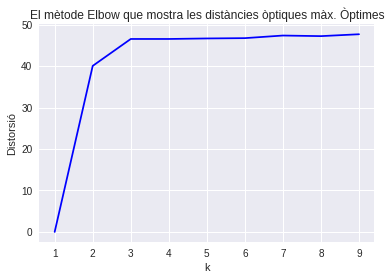

In [4]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(dataset)
    distortions.append(np.max(np.max(cdist(kmeanModel.cluster_centers_, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsió')
plt.title('El mètode Elbow que mostra les distàncies òptiques màx. Òptimes')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>[OPCIONAL] Implementació:</strong> algorisme <i>k-means</i> des de zero.  
</div>

En aquest cas, amb 2 dimensions, és molt senzill inferir el nombre de clústers visualitzant les dades. Però aquest mètode és de gran utilitat quan es compta amb dades d'alta dimensionalitat.

## 2. Més enllà de k-means: clustering jeràrquic (3 punts)

Però no tots els datasets són com els de l'exercici anterior. Per a aquesta segona part anem a emprar els següents conjunts de dades:

In [5]:
data_circles = ('circles', *datasets.make_circles(n_samples=N_SAMPLES, factor=.5, noise=.05))
data_moons = ('moons', *datasets.make_moons(n_samples=N_SAMPLES, noise=.05))
data_blobs = ('blobs', *datasets.make_blobs(n_samples=N_SAMPLES, random_state=8))
data_square = ('square', np.random.rand(N_SAMPLES, 2), np.array([0] * N_SAMPLES))

# Guardamos todos los datasets en una tupla.
datasets_tuple = (data_circles, data_moons, data_blobs, data_square)

On cada variable: *data_circles*, *data_moons*, *data_blobs* i *data_square* és una tupla amb tres posicions: el nom del dataset i els dos valors retornats per la funció que genera el dataset:

In [84]:
datasets.make_circles?

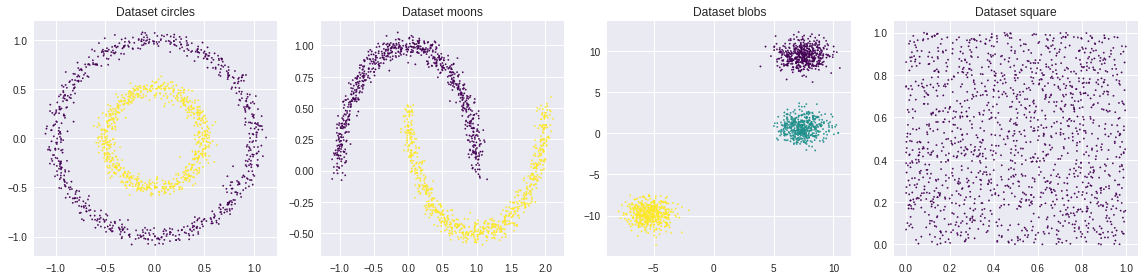

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for data, axis in zip(datasets_tuple, ax.reshape(-1)):
    axis.scatter(data[1][:,0], data[1][:,1], c=data[2], s=2, cmap='viridis')
    axis.set_title('Dataset {}'.format(data[0]))
plt.tight_layout()

### 2 a. *k-means*

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> aplica la regla del colze per decidir el valor de $k$ en cada un dels datasets.
</div>

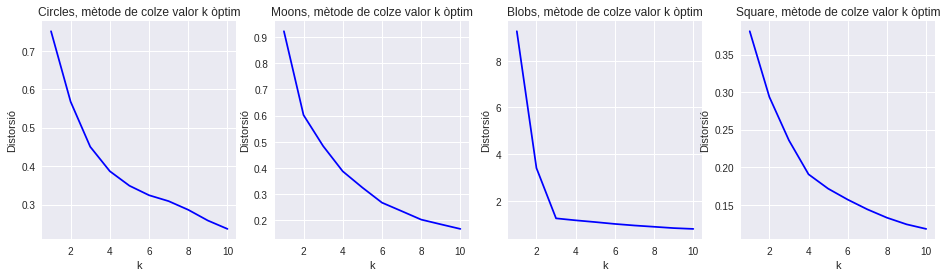

In [29]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pylab as pl

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for data, axis in zip(datasets_tuple, ax.reshape(-1)):
    x = data[1][:,0]
    y = data[1][:,1]
    # create new plot and data
    plt.plot()
    X = np.array(list(zip(x, y)))
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    # k means determine k
    distortions = []
    score = []
    K = range(1,11)

    for k in K:
        kmeanModel = cluster.KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        
    # Plot the elbow
    axis.plot(K, distortions, 'bx-')
    axis.set_xlabel('k')
    axis.set_ylabel('Distorsió')
    axis.set_title(data[0].title() +', mètode de colze valor k òptim')
    

Podem veure, mitjançant el mètode del "colze", que en el dataset blobs quan es normalitza l'error quadràtic és quan k=3, per tant el nombre òptim de particions és 3, pel que fa a la resta de datasets no podem establir el número de clústers amb aquest mètode, inclús augmentant les iteracions no podem veure quan es normalitza.

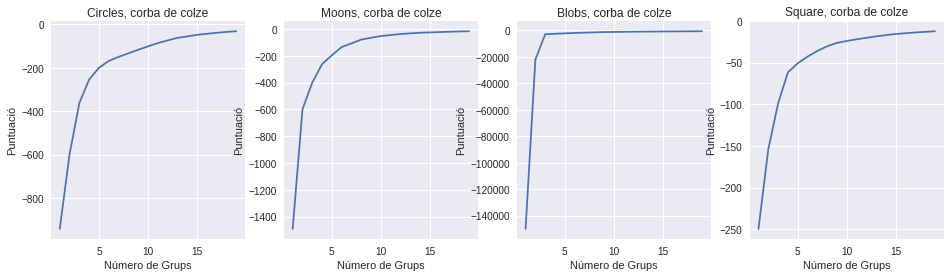

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for data, axis in zip(datasets_tuple, ax.reshape(-1)):
    x = data[1][:,0]
    y = data[1][:,1]
    # create new plot and data
    X = np.array(list(zip(x, y)))
    plt.plot()
    Nc = range(1, 20)
    kmeans = [cluster.KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
   
    axis.plot(Nc,score)
    axis.set_xlabel('Número de Grups')
    axis.set_ylabel('Puntuació')
    axis.set_title(data[0].title() + ', corba de colze')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> aplica <i>k-means</i> amb el valor de $k$ escollit en cada dataset.
<br>
Visualitza el resultat en un <i>scatter plot</i> representant cada clúster amb un color diferent.
</div>

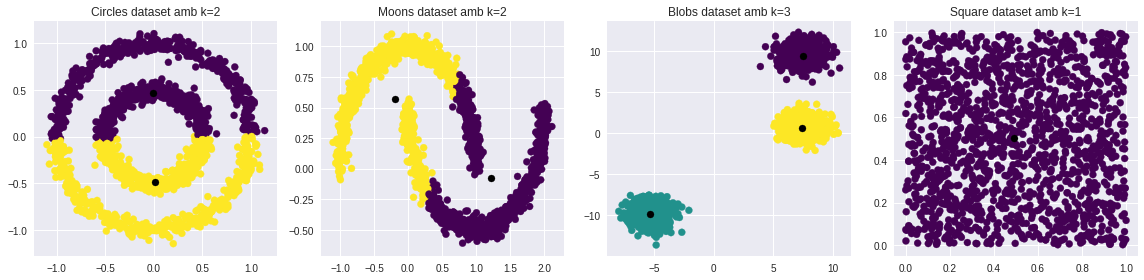

In [31]:
# sóls hem pogut obtenir com a particions optimes el dataset blobs amb k=3
partitions = [2,2,3,1]
i=0
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for data, axis in zip(datasets_tuple, ax.reshape(-1)):
    x1 = data[1][:,0]
    x2 = data[1][:,1]
    
    plt.plot()
    X = np.array(list(zip(x1, x2)))
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    distortions = []
    k = partitions[i]

    kmeanModel = cluster.KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    axis.set_title(data[0].title() +' dataset amb k='+str(k))
    axis.scatter(X[:,0],X[:,1], c = kmeanModel.labels_, cmap='viridis')  
    axis.scatter(kmeanModel.cluster_centers_[:,0],kmeanModel.cluster_centers_[:,1], color='black')  

    i = i + 1 
    
plt.tight_layout()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Què ha passat? Explica els motius pels quals creus que s'ha produït aquest resultat.  
</div>

Com podem veure en la representació gràfica, sols el dataset 3 les dades són suficientment homogènies per poder traure el nombre de particions òptimes, mitjançant el mètode elbow o del colze, degut que no és tolerant al soroll i ha provocat l'efecte cadena en calcular la distancia entre els grups per enllaç simple.

### 2 b. Agrupament Jeràrquic Aglomeratiu

En aquest apartat es demana visualitzar mitjançant un [dendrograma](https://en.wikipedia.org/wiki/Dendrogram) la construcció progressiva dels grups mitjançant un algoritme jeràrquic aglomeratiu (estratègia *bottom-up*). Amb això es pretén trobar un mètode gràfic per determinar el nombre de clústers en cada escenari.

Com mètrica s'emprarà la distància euclidiana, però com a [criteri d'enllaç o *linkage*](https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria) es demana provar diferents mètodes per a posteriorment comentar les seves resultats. Per a la implementació es poden utilitzar els mòduls dendogram i linkage de SciPy.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> prova diferents criteris d'enllaç amb el mètode jeràrquic aglomeratiu per seleccionar el criteri d'enllaç que permeti identificar els clústers subjacents a través del seu dendrograma.
</div>

L'algorisme que tractarem és un dels més coneguts i és l'agrupament jeràrquic. Aquest algorisme, amb una mètrica, comença a detectar distàncies entre les dades, agrupant a les dades més properes en grups. Una vegada trobats els primers grups, aquests es prenen com a unitats, buscant novament veïns propers.

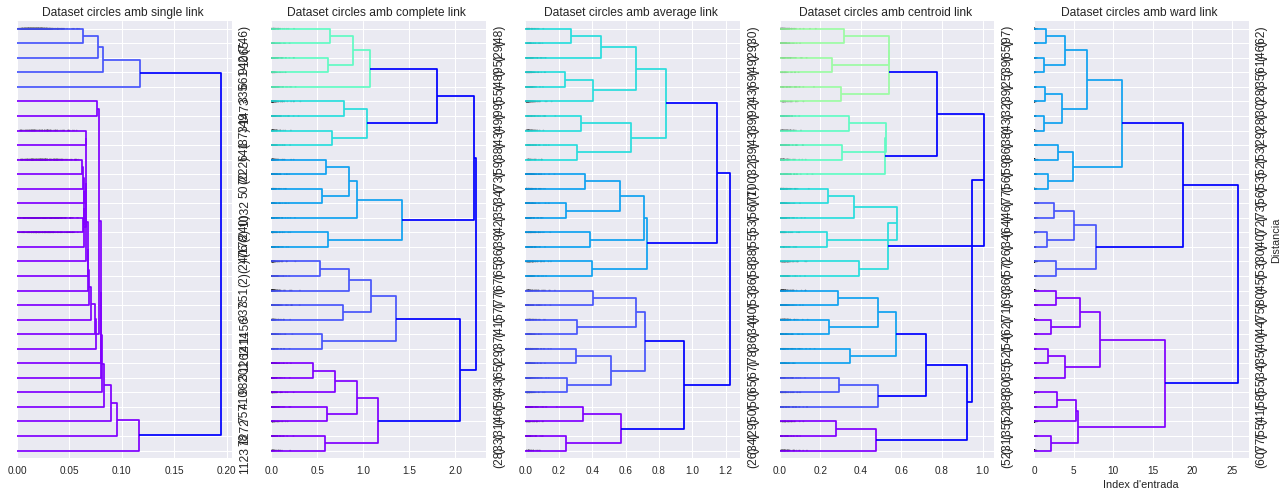

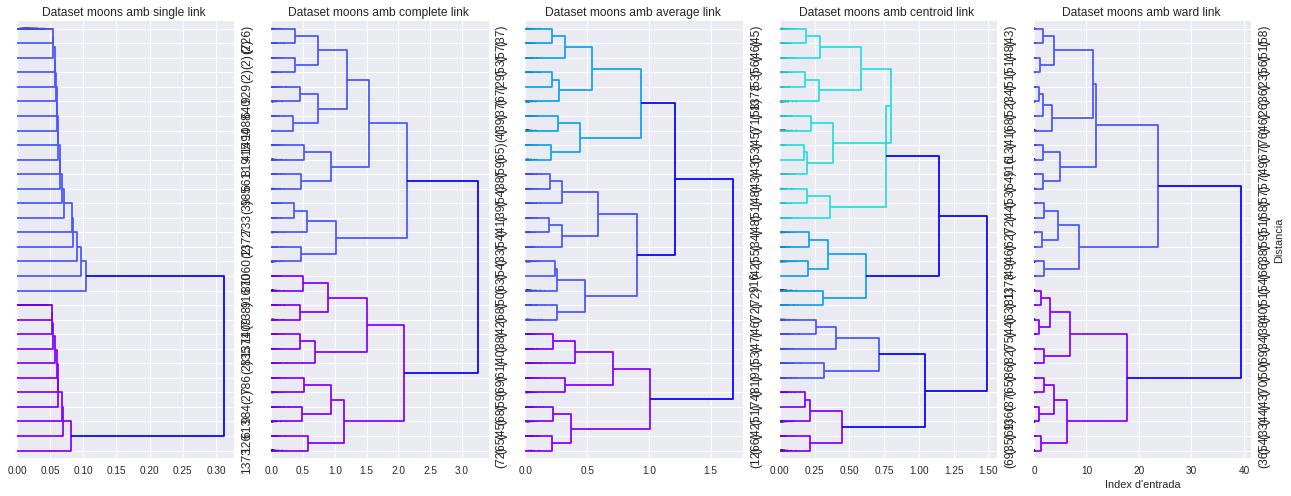

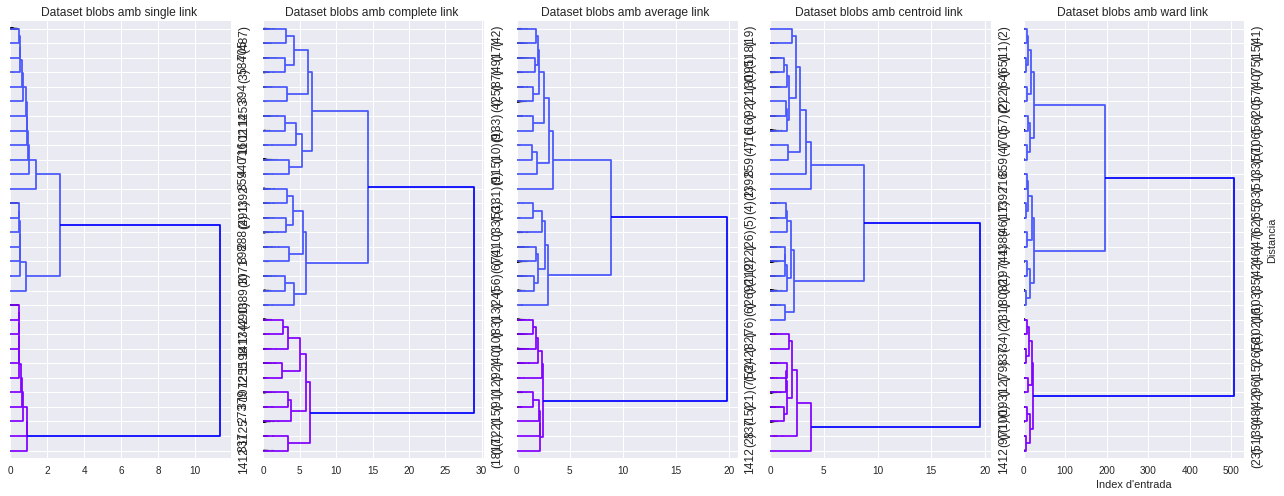

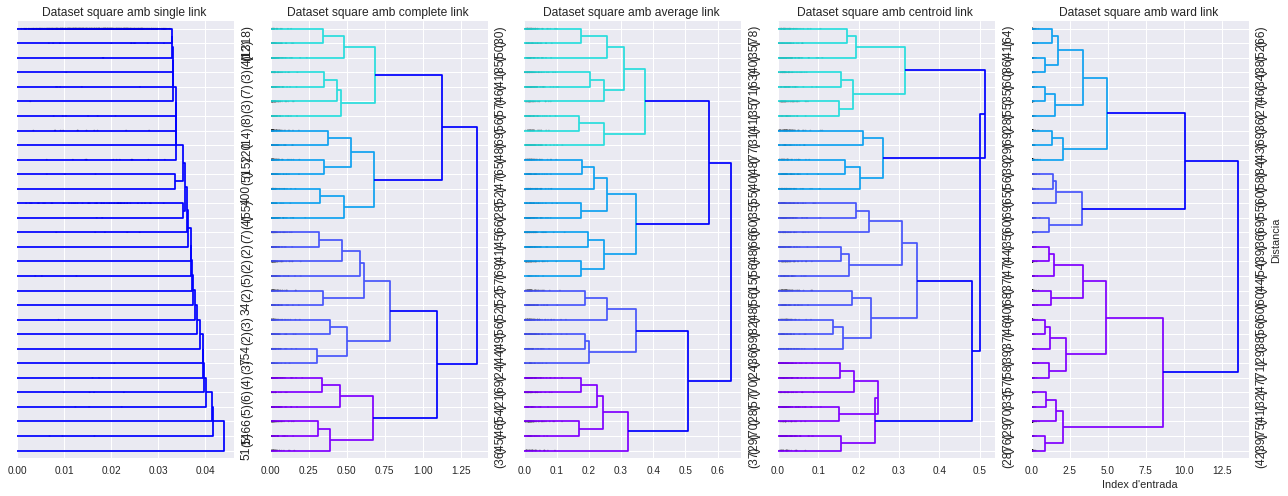

In [14]:
from scipy.cluster import hierarchy
import matplotlib as mpl
import numpy as np
from matplotlib.pyplot import cm

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

type_list = ['single','complete', 'average', 'centroid' , 'ward']

for data in datasets_tuple:   
    x1 = data[1][:,0]
    x2 = data[1][:,1]
    
    fig, ax = plt.subplots(1,len(type_list), figsize=(18, 7))
    i=0
    for type, axis in zip(type_list, ax.reshape(-1)):
        X = np.array(list(zip(x1, x2)))
        Z = hierarchy.linkage(X, type)
        dn = hierarchy.dendrogram(
            Z,
            ax=ax[i],
            truncate_mode='lastp',  # mostrar només l'últim p per fusionar grups
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,  # truncar branques
            orientation = 'right'
        )
        cmap = cm.rainbow(np.linspace(0, 1, 10))
        hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
        axis.yaxis.set_label_position('right')
        axis.yaxis.tick_right()
        axis.set_title('Dataset {} amb {} link '.format(data[0], type))
        i=i+1
        
    plt.xlabel('Index d\'entrada')
    plt.ylabel('Distancia')
    plt.tight_layout()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Quin criteri d'enllaç es comporta millor per als diferents escenaris? Per què?
</div>

L'enllaç simple assumeix, de forma implícita, que la mesura de similitud deuria ser transitiva, la qual cosa és solament aplicable en alguns dominis. En general, és preferible escollir l'enllaç complet, que promou la formació de clústers compactes i homogenis, encara que perd la propietat de monotonicidad. L'enllaç mitjà pot representar un bon compromís entre tots dos.

#### Critica d'enllaç per medir la distancia entre grups:

* Dataset Circle: En aquest dataset menys el simple linkage, la resta tenen un comportament similar amb branques homogènies, per tant seleccionarem el average o el ward linkage, per ser mes tolerant al soroll.

* Dataset Moons: En aquest cast el metodo completed linkage, ens dóna 2 branques molt homogènies, podem veure 2 klusters perfectament, relacionàrem aquest.

* Dataset Bloobs: Igual que en el segon cas tots els mètodes menys el simple linkage obtenim branques homogènies, seleccionar ward linkage o el complet.

* Dataset Square: Igual que en el primer cas el mètode completed linkage, ens dóna 2 branques molt homogènies, podem veure 2 klusters perfectament, selecionarem aquest.

A nivell d'agrupació o granularitat, podem observar que podem poder observant l'agrupació de clusters homogenis i els que tenen un nombre de fulles similar en cada branca.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> després de seleccionar el criteri d'enllaç i els llindars (eix d'ordenades del dendrograma) en el pas anterior es demana visualitzar, per a cada dataset, 1 <i>scatter plot</i> on cada clúster quedi representat un color diferent. 
</div>

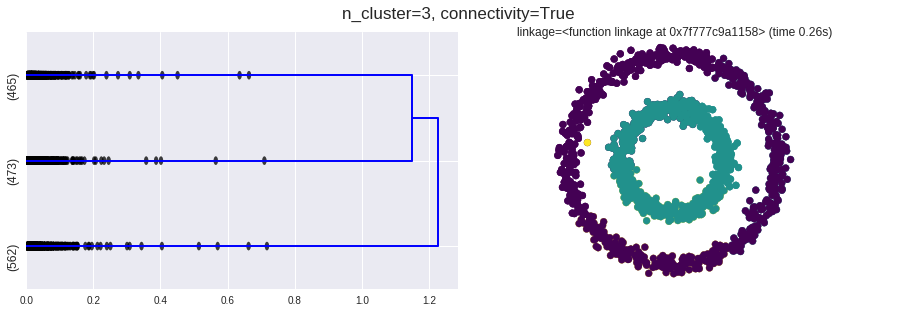

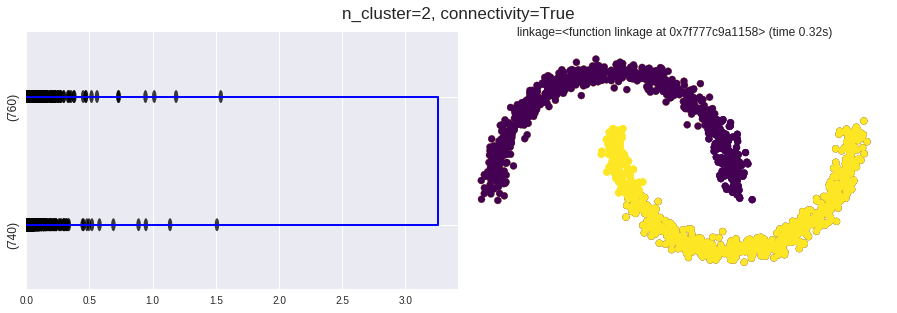

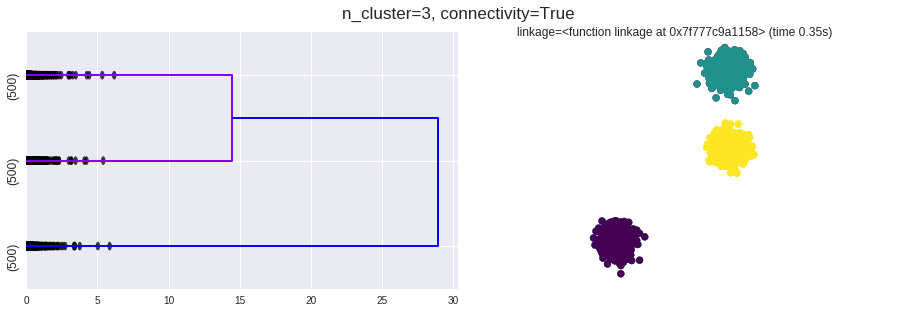

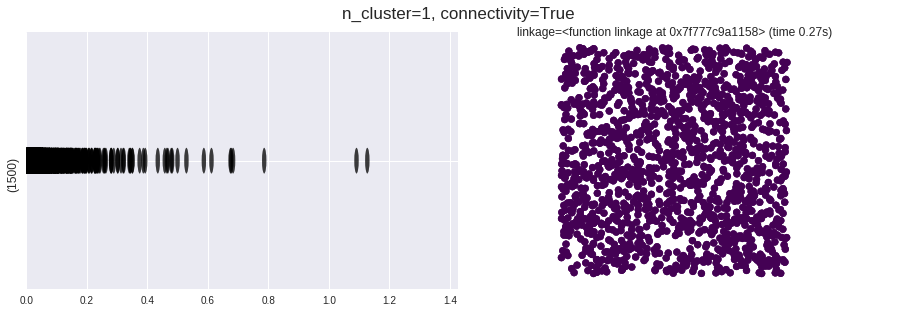

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import time
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

type_list_selected = ['average','complete', 'complete', 'complete']
pruning_k = [3,2,3,1]
i=0

for data in datasets_tuple:    
    fig, ax = plt.subplots(1,2, figsize=(12, 4))
    ax.reshape(-1)
    x1 = data[1][:,0]
    x2 = data[1][:,1]

    X = np.array(list(zip(x1, x2)))
    Z = linkage(X, type_list_selected[i])
    
    knn_graph = kneighbors_graph(X, 30, include_self=False)

    for connectivity in (None, knn_graph):
        model = AgglomerativeClustering(
            linkage=type_list_selected[i], 
            connectivity=connectivity,
            n_clusters=pruning_k[i]
        )
        t0 = time.time()
        model.fit(X)
        elapsed_time = time.time() - t0
        plt.scatter(X[:, 0], X[:, 1], c=model.labels_,  cmap='viridis')
        plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                          fontdict=dict(verticalalignment='top'))
        plt.axis('equal')
        plt.axis('off')

        plt.subplots_adjust(bottom=0, top=.89, wspace=0, left=0, right=1)
        plt.suptitle('n_cluster=%i, connectivity=%r' %(pruning_k[i], connectivity is not None), size=17)
        cmap = cm.rainbow(np.linspace(0, 1, 10))
        hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
        dn = dendrogram(
            Z,
            ax=ax[0],
            truncate_mode='lastp',
            p=pruning_k[i], # poda
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,
            orientation = 'right'
        )
        
    i=i+1
    plt.show()

## 3. Reducció de dimensionalitat: PCA i t-SNE (3 punts)

En plantejar un problema de classificació amb un dataset de més de tres atributs (dimensions), no es pot fer una visualització clàssica del dataset per entendre les dades. Per això, un dels usos dels mètodes de reducció de dimensionalitat és transformar les dades de més de 4 dimensions a 3 o menys per poder visualitzar-los.

### 3 a. PCA

El [dataset Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) conté 4 atributs sobre tres tipus de flors.

In [22]:
iris = datasets.load_iris()
X = iris.data   # np.array amb shape (150, 4)
y = iris.target # np.array amb shape (150,)

En excedir les 3 dimensions necessitarem més d'una visualització per entendre les dades.

Per solucionar-ho, una alternativa és usar els [*pair plots*](http://seaborn.pydata.org/generated/seaborn.pairplot.html) que mostren parells de dimensions per intentar donar una visió global a partir d'un [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html):

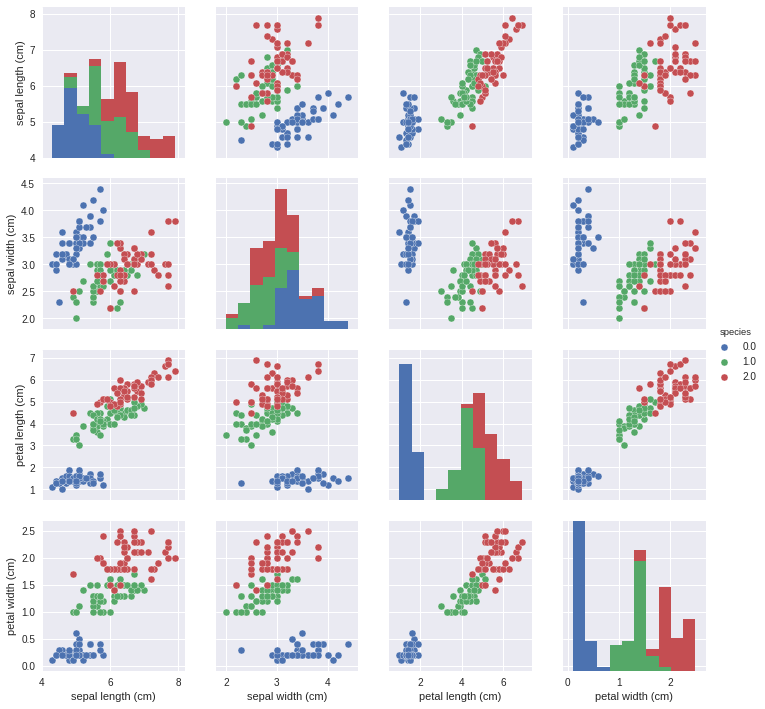

In [24]:
# DataFrame 
iris_df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]), columns=iris.feature_names + ['species'])
sns.pairplot(iris_df, vars=iris.feature_names, hue="species")

Com a alternativa a les múltiples gràfiques que generen els *pair plots*, es planteja utilitzar una tècnica de reducció de dimensionalitat per passar de 4 dimensions a 2. Cal notar que gràfiques com *longitud de pètal* vs *amplada de pètal* mostren certa separabilitat (els 3 tipus de flors estan aparentment separats).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> realitzar una reducció de dimensionalitat amb PCA per passar de 4 dimensions a 2 i crear una visualització on el color dels punts depengui del tipus de flor a la qual pertany. Es pot utilitzar la implementació de PCA en scikit-learn que es va utilitzar en la PAC1.
</div>

Explicació de la relació de variància (dos primers components): [ 0.92462  0.05302]


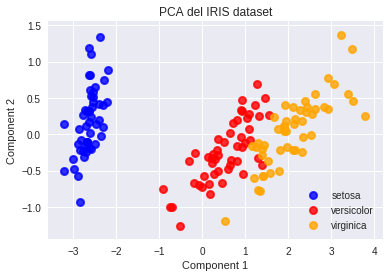

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

target_names = iris.target_names

# Estandarizem les dades
X_r = pca.fit(X).transform(X)

# Percentatge de variància explicat per a cada component
print('Explicació de la relació de variància (dos primers components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['blue', 'red', 'orange']
lw = 2

# graficando el dataset reducido a 2 componenetes
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name, cmap='viridis')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA del IRIS dataset')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> El resultat de la reducció de dimensionalitat manté la separabilitat? Era d'esperar? Per què?
</div>

En general es manté la separabilitat, però podem veure que els atributs 1 i 2 tenen covariància, ho podem veure de forma gràfica en els grups.

### 3 b. t-SNE (t-distributed Stochastic Neighbor Embedding)

L'ús de tècniques de reducció de dimensionalitat és de gran utilitat quan aquesta és molt alta. Per exemple, el [dataset Digits](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) conté 1797 imatges de nombres del 0 al 9, de 8 per 8 píxels. Si es pren cada píxel com una dimensió, això es tradueix en què cada mostra té 64 dimensions!

In [120]:
digits = datasets.load_digits()
X = digits.data   # np.array amb shape (1797, 64)
y = digits.target # np.array amb shape (1797,)

Exemple dels 24 primers números de 8 per 8 píxels al costat de la seva etiqueta presents al dataset:

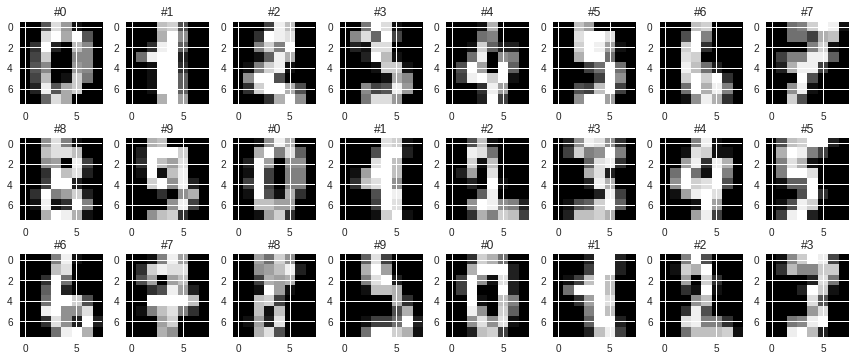

In [121]:
fig, ax = plt.subplots(3, 8, figsize=(12, 5))
for i, axis in zip(range(24), ax.reshape(-1)):
    axis.imshow(X[i,:].reshape(8, 8), cmap='gray')
    axis.set_title('#{}'.format(y[i]))
plt.tight_layout()

Amb un nombre tan elevat de dimensions perd sentit visualitzar el dataset amb un * pair plot * i apareixen altres perills com la [maldició de la dimensionalitat](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n).
Per reduir la seva dimensió i així entendre l'estructura de les dades en alta dimensionalitat hi ha diferents alternatives amb resultats molt diferents.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> realitzar una reducció de dimensionalitat amb PCA per passar de 64 dimensions a 2 i crear una visualització on el color dels punts depengui del dígit que pertany.
</div>

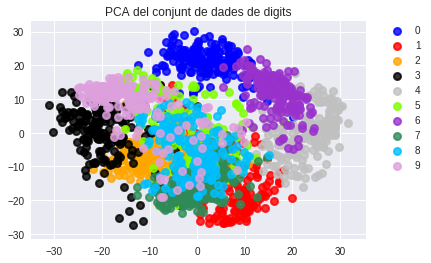

In [124]:
from sklearn.decomposition import PCA

datasetAtributes = X
datasetClasses = y
datasetClass = np.unique(y)

pca = PCA(n_components=2)
pcaClassification = pca.fit(datasetAtributes).transform(datasetAtributes)

plt.figure()
colors = ['blue', 'red', 'orange', 'black', 'silver', 'chartreuse', 'darkorchid', 'seagreen', 'deepskyblue', 'plum']
   
for color, target_name in zip(colors, datasetClass):
    plt.scatter(pcaClassification[datasetClasses == target_name, 0],
                pcaClassification[datasetClasses == target_name, 1],
                color=color, alpha=.8, lw=2,
                label=target_name)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PCA del conjunt de dades de digits')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> El resultat de la reducció de dimensionalitat manté la separabilitat? Era d'esperar? Per què?
</div>

Podem veure en general, que hi ha diferents grups, per contra molts estan massa cohesionats utilitzant l'algoritme per reduir la dimensionalitat PCA, normal degut que algunes xifres són molt paregudes, per tant com veurem el t-SNE en aquest cas serà més optim fent una separació d'aquests.

L'algoritme [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) desenvolupat per [van der Maaten y Hinton](https://lvdmaaten.github.io/tsne/) difereix de PCA en què no tracta de maximitzar la variància explicada. Intuïtivament, t-SNE tracta que el veïnatge d'un punt en baixa dimensionalitat sigui la mateixa que l'original. Partint d'una localització aleatòria de cada punt, corregeix la seva posició de forma iterativa tractant de minimitzar la distància als seus veïns originals fins a convergir.

Per a això, t-SNE disposa de diversos [paràmetres](https://distill.pub/2016/misread-tsne/) que poden modificar dràsticament el resultat. Pel que recomana conèixer el seu funcionament abans d'aplicar la tècnica.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> realitzar una reducció de dimensionalitat amb t-SNE per passar de 64 dimensions a 2 i crear una visualització on el color dels punts depengui del dígit que pertany. La llibreria scikit-learn conté un mòdul TSNE que permet realitzar aquest tipus de reducció de dimensionalitat.
</div>

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.394135
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.943273
[t-SNE] Error after 200 iterations: 0.943273


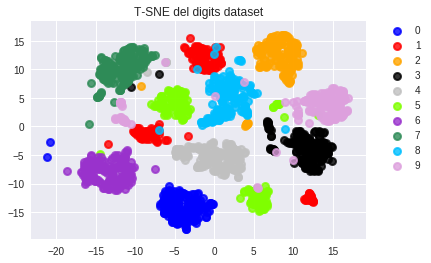

In [14]:
from sklearn.manifold import TSNE

datasetAtributes = X
datasetClasses = y
datasetClass = np.unique(y)

tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=250)
tsneClassification = tsne.fit_transform(datasetAtributes)

plt.figure()
colors = ['blue', 'red', 'orange', 'black', 'silver', 'chartreuse', 'darkorchid', 'seagreen', 'deepskyblue', 'plum']

for color, target_name in zip(colors, datasetClass):
    plt.scatter(
        tsneClassification[datasetClasses == target_name, 0], 
        tsneClassification[datasetClasses == target_name, 1], 
        color=color, 
        alpha=.8, 
        lw=2, 
        label=target_name
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('T-SNE del conjunt de dades de digits')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> El resultat de la reducció de dimensionalitat manté la separabilitat? Era d'esperar? Per què?
</div>

L'algoritme T-SNE varia el resultat segons 2 paràmetres, el qual itinera sobre els valors que més s'apropen i anul·la els més diferents, en aquest es comportarà millor ens els grups que s'encavalquen. Un d'aquests paràmetres és la perplexitat, és important perquè defineix els veïns que tindrà cada punt, un bon grup de veïns seria 35, després de fer diverses proves, a més es recomana entre 5 i 50.

L'altre paràmetre és el nombre d'intents o iteracions, hi ha un límit mini'm de 200, hem de cercar un número que sigui optim que però que ens doni un bon resultat, en aquest he seleccionat 250, després de diverses proves.

Finalment, el resultat és el que esperàvem, defineix molt més els grups, com ja hem comentat, i separar per exemple respecte a l'anterior el 8 i 9 que són molt pareguts.

## 4. Aplicacions (2 punts)

### 4 a. Compressió de imatges

Les imatges en color es composen de píxels que tenen tres components (vermell, blau i verd), destinant 1 *byte* a cada canal. Per tant, podent representar $2 ^ 8 = 256$ vermells, verds i blaus, amb un total de $2^{8^{3}} = 2^{24} = 16777216$ colors representables en cada píxel.

Com més gran sigui el nombre de colors representables, més memòria serà necessària per a emmagatzemar la imatge.
Per tant, una estratègia per comprimir una imatge pot ser disminuir els colors representables en cada píxel, necessitant menys *bits* per guardar el valor d'un píxel. Aquest mètode no és reversible, és a dir, no es pot tornar a recuperar la imatge original a partir de la comprimida. Per tant, aquest tipus de compresión s'anomena [compressió amb pèrdua](https://es.wikipedia.org/wiki/Algoritmo_de_compresi%C3%B3n_con_p%C3%A9rdida).

Però, com seleccionem els "píxels semblants" a la imatge original i determinem el seu color a la imatge comprimida? Una opció és utilitzar *k-means* on **$k$ serà el nombre de colors representables**, els punts que pertanyen a cada clúster equivaldrien als "píxels semblants" i les coordenades dels **centroides actuaran com els colors finals** als quals s'aproximaran els "píxels semblants".

Com a resultat del clustering, s'obté una paleta de colors reduïda (coordenades dels centroides) on cada píxel de la imatge farà referència a un d'aquests colors (clúster al qual pertany). L'ús de paletes de colors o [colors indexats](https://en.wikipedia.org/wiki/Indexed_color) és un recurs utilitzat per diferents formats de imatges, com *PNG*, *GIF* o *TIFF*.

Imatge amb 33750 píxels (101250 bytes)


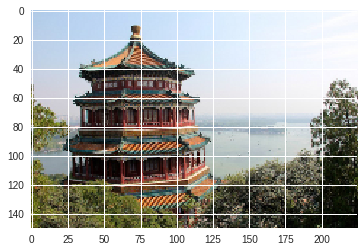

In [46]:
from skimage import transform

photo = transform.resize(datasets.load_sample_image("china.jpg"), (150, 225), mode='edge')
plt.imshow(photo)
X = photo.reshape(-1, 3) # np.array amb shape (33750, 3)
print('Imatge amb {} píxels ({} bytes)'.format(X.shape[0], X.shape[0] * 3))

Per facilitar la tasca, la imatge anterior està guardada en un *array* amb tantes files com píxels i columnes com canals (vermell, verd i blau). De manera que cada "mostra" equival al valor d'un píxel.

Es pot tornar a recompondre la imatge original amb:
```
plt.imshow(X.reshape(photo.shape))
```
Podem veure cada píxel com un punt en un sistema de coordenades de 3 dimensions on una és la seva quantitat de vermell, una altra la seva quantitat de verd i finalment la seva quantitat de blau. Pel que podem fer una visualització en 3 dimensions dels píxels sobre la qual es provarà l'algoritme de clustering:

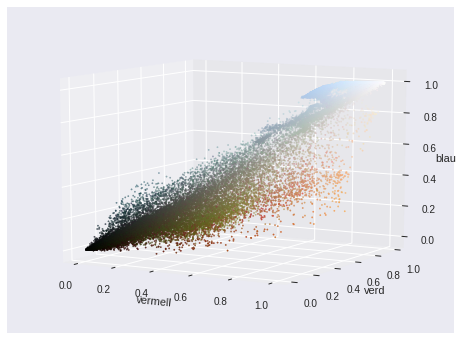

In [3]:
from mypy_extensions import NoReturn
from mpl_toolkits.mplot3d import Axes3D

def plot_pixels_3d(data: "np.array[float]", elev: int = None, azim: int = None) -> NoReturn:
    """Visualitza píxels en un scatter plot 3d (una por canal) amb el seu color corresponnent.
    
    Args:
        data: np.array (punts, 3)
        elev: int
            angle d'elevació en el pla z.
        azim: int
            angle acimut en el pla x, y.
    """
    assert data.shape[1] == 3, 'Cal un array bidimensional amb 3 columnes: (vermell, verd i blau)'
    ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], s=2, c=data)
    ax.set_xlabel('vermell')
    ax.set_ylabel('verd')
    ax.set_zlabel('blau')
    ax.view_init(elev, azim)
    plt.show()

plot_pixels_3d(X, 10)

A la visualització anterior s'ha representat cada píxel amb el seu color, on les seves coordenades en els 3 colors oscil·len entre 0 (no té aquesta component) i 1. Podem comprovar com els píxels en coordenades (1, 1, 1) (a dalt a la dreta) són píxels blancs i els situats en (0, 0, 0) són píxels negres. També s'observen 3 núvols de píxels: un blau, on hi ha els píxels del cel i aigua, un altra verd que es correspon amb els píxels de la vegetació i una rogenca per a la Pagoda.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> representar la imatge amb 256, 128, 64, 32, 16, 8, 4 i 2 colors i indicar els bytes que ocuparia cadascuna de les opcions.
</div>

#### Representació with K-means

Dimensions de la imatge original
(150, 225, 3)


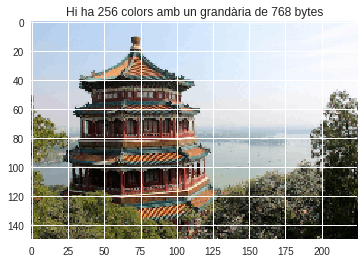

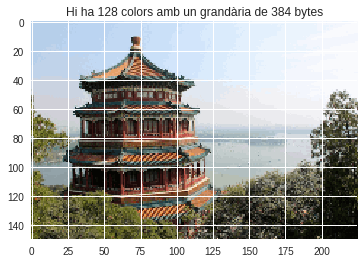

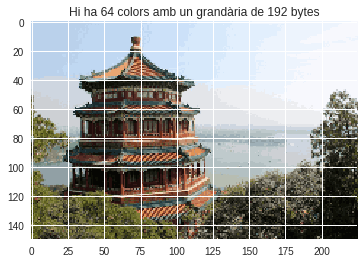

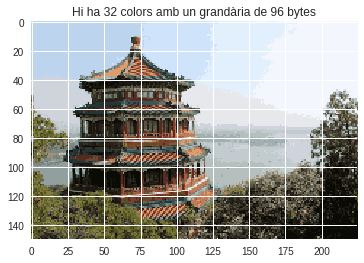

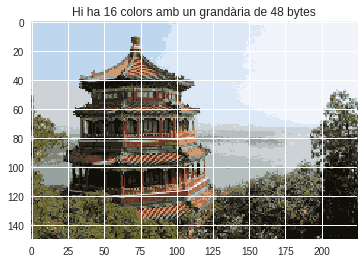

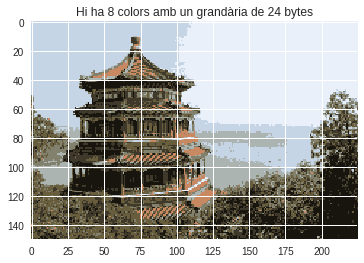

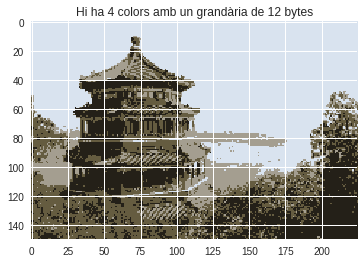

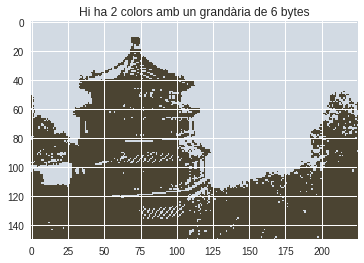

In [103]:
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin

#treiem les dimensions de la photo
print('Dimensions de la imatge original')
print(photo.shape)

for colors in (256,128,64,32,16,8,4,2):   
    w, h, d = original_shape = tuple(photo.shape)
    image_array = np.reshape(photo, (w * h, d))

    kmeans = cluster.KMeans(n_clusters=colors, random_state=0, n_init=10, max_iter=200).fit(image_array)
    labels = kmeans.predict(image_array)
    imageSize = format(kmeans.cluster_centers_.shape[0] * d)
    
    def recreate_image(codebook, labels, w, h):
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image
    

    plt.figure()
    plt.clf()
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.title('Hi ha ' + str(colors) + ' colors amb una grandària de '+ str(imageSize) + ' bytes')

#### Representació with PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Descriu el comportament de <i>k-means</i> sobre les imatges. ¿Un altre algoritme produiria un resultat diferent? Quines diferències i per què?
</div>

Una imatge digital és una representació bidimensional d'una imatge utilitzant bits, l'algoritme de k-means inici de forma aleatòria els centroides, creant els k clústers (representen cada grup un color) associats en cada observació al centroide més proper. El centroide de cada clúster es converteix en una nova mitja. Es repeteixen els passos anteriors fins a arribar a una convergència, així obtenir en l'etiqueta a quin grup pertany cada pixel.

Cada grup per nosaltres representa un color, un cop tornar a presentar obtenim a imatge amb menys color per tant més comprimida, però en iniciar els centroides de forma aleatòria, els colors o grups poden canviar en cada execució.

Per tant en altres algoritmes obtindríem un altre resultat, com podem veure que hem utilitzat el kmeans i el PCA, reduir la dimensionalitat, el resultat és diferent quan menys color o grups (k) indiquem.

Les diferencies seran els colors o clústers, degut que el kmeans realitza una inicialització aleatòria dels centroides, o podem veure com menys grup formen (a més compressió o pèrdua de colors).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>[OPCIONAL] Implementació:</strong> realitza la compressió d'imatges amb un altre algorisme de clustering. 
</div>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dimensions de la imatge original
(150, 225, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


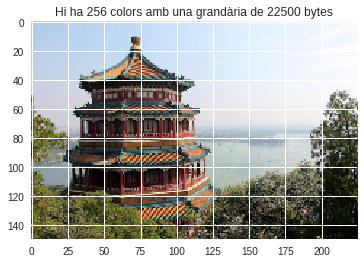

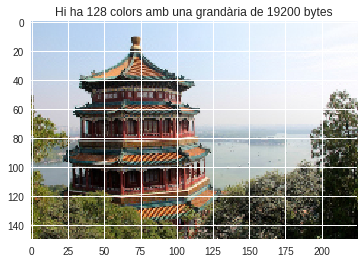

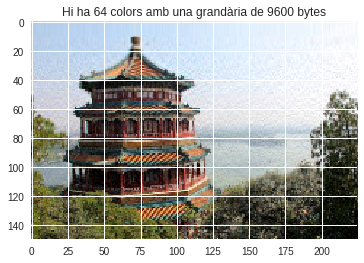

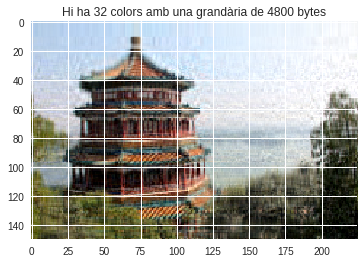

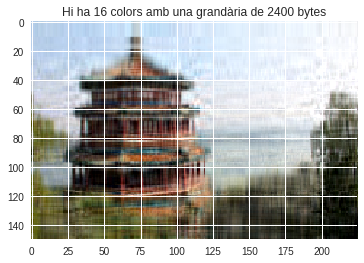

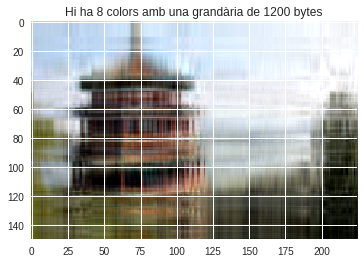

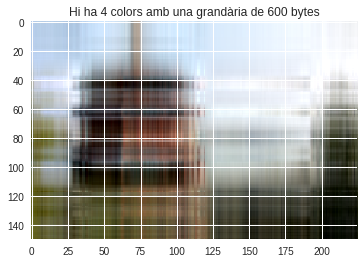

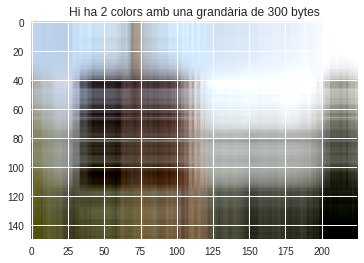

In [48]:
from sklearn.decomposition import PCA

#treiem les dimensions de la photo
print('Dimensions de la imatge original')
print(photo.shape)

#escalem la informació de la photo a un format que entengui el PCA
dataset = np.reshape(photo, (150, 225*3))

for colors in (256,128,64,32,16,8,4,2):
    pcaModel = PCA(colors).fit(dataset)
    pcaClassification = pcaModel.transform(dataset) 

    X = pcaClassification.reshape(-1, 3)
    imageSize = format(X.shape[0] * 3)

    #Tornem a transformar el dataset en el format original per dibuixar la imatge
    newImage = pcaModel.inverse_transform(pcaClassification)
    plt.figure()
    plt.imshow(np.reshape(newImage, photo.shape))
    plt.title('Hi ha ' + str(colors) + ' colors amb una grandària de '+ str(imageSize) + ' bytes')

El resultat podem veure que canvia gràficament, en 64 components la imatge té un bon ràtio de qualitat i en general el resultat és més ràpid que amb l'algoritme kmeans.

### 4 b. Segmentació d'imatges de satèl·lit

Avui dia els mapes de carreteres, geològics, agrícoles... es confeccionen amb imatges satèl·lits. Per a això cal interpretar aquestes imatges buscant-hi els elements d'interès. Donat el volum actual d'imatges que generen els satèl·lits, fer la segmentació de forma manual no és una opció i per això hi ha tants esforços en la seva automatització.

Assumint que l'espai de píxels té certa estructura i que els diferents elements a cercar són grups en ella, és raonable pensar que una estratègia de clustering (entre moltes altres) pot trobar aquests grups en aquesta estructura, permetent automatitzar la segmentació d'imatges.

Partim d'una imatge amb diversos tipus de vegetació i camins:

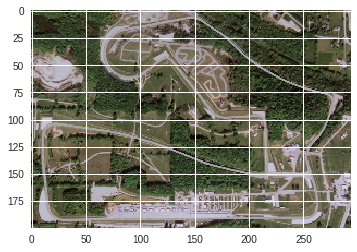

In [3]:
from skimage import io, transform

photo = transform.resize(
    io.imread('http://www.trackcreation.net/devdiary/images/road_america_base.jpg'),
    (200, 294), mode='edge')
plt.imshow(photo)
X = photo.reshape(-1, 3)

Igual que en l'apartat anterior, s'ha donat un format de *array* a la imatge amb tantes files com píxels i 3 columnes (una per canal).

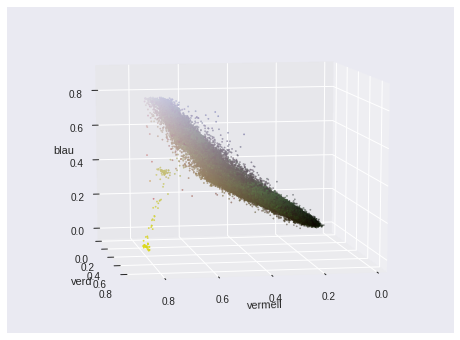

In [19]:
plot_pixels_3d(X, 10, 80)

Visualitzant en 3 dimensions els píxels de la imatge veiem que en aquest cas no estan tan diferenciats els grups. Però sí que els píxels més clars pertanyen a la zona de camins i els més foscos a l'àrea de vegetació.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> aplica una tècnica de clustering per separar els camins de la vegetació i visualitza tant la imatge original com la resultant després d'aplicar la segmentació per comparar el resultat.
</div>

Dimensions de la imatge original
(200, 294, 3)


Text(0.5,1,'Hi ha 2 colors amb una grandària de 600 bytes')

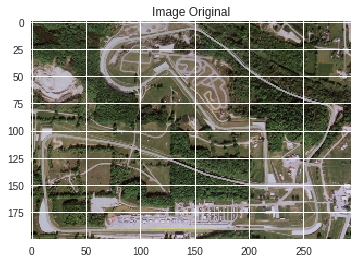

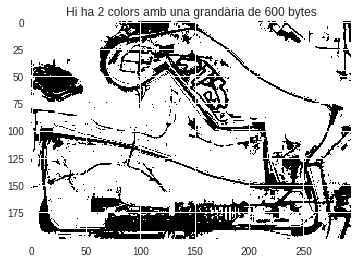

In [29]:
#treiem les dimensions de la photo
print('Dimensions de la imatge original')
print(photo.shape)

rows = photo.shape[0]
cols = photo.shape[1]

image = photo.reshape(rows*cols,3)
kmeans = cluster.KMeans(n_clusters = 2, n_init=10, max_iter=20)
kmeans.fit(image)

labels = np.asarray(kmeans.labels_, dtype=np.uint8)  # les etiquetes per a cada punt que indiquen a quina clúster pertany aquest punt
labels = labels.reshape(rows,cols); 
imageSize = format(labels.shape[0] * 3)
   
plt.imshow(photo)
plt.title('Image Original')

plt.figure()

plt.imshow(labels)
plt.title('Hi ha 2 colors amb una grandària de '+ str(imageSize) + ' bytes')

Agrupem els punts amb K-means usant k=2.

Les etiquetes per a cada punt que indiquen a quin clúster pertany aquest punt, en aquest 0 0 o 1 que correspon a un color.

Podem veure els dos colors, blanc per als camins i negre per la resta.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació i anàlisi:</strong> torna a aplicar-ho buscant 3 clústers. Quina regió representa cada un d'ells?
</div>

Dimensions de la imatge original
(200, 294, 3)


Text(0.5,1,'Hi ha 3 colors amb una grandària de 600 bytes')

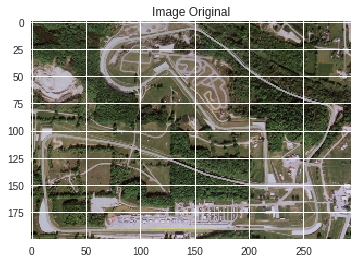

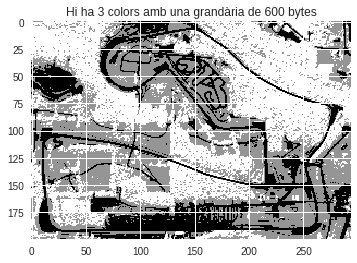

In [11]:
#treiem les dimensions de la photo
print('Dimensions de la imatge original')
print(photo.shape)

rows = photo.shape[0]
cols = photo.shape[1]

image = photo.reshape(rows*cols,3)
kmeans = cluster.KMeans(n_clusters = 3, n_init=10, max_iter=20)
kmeans.fit(image)

labels = np.asarray(kmeans.labels_, dtype=np.uint8)  # les etiquetes per a cada punt que indiquen a quina clúster pertany aquest punt
labels = labels.reshape(rows,cols); 
imageSize = format(labels.shape[0] * 3)

plt.imshow(photo)
plt.title('Image Original')
plt.figure()
plt.imshow(labels)
plt.title('Hi ha 3 colors amb una grandària de '+ str(imageSize) + ' bytes')

Agrupem els punts amb K-means usant k=3.

Les etiquetes per a cada punt que indiquen a quin clúster pertany aquest punt, en aquest 0, 1 o 2 que correspon a un color; blanc, gris i negre.

Podem veure els tres colors, negre per als camins, blanc per la vegetació i gris per les zones que no tenen vegetació.

### Referencies

* Elbow method o regla del colze: https://pythonprogramminglanguage.com/kmeans-elbow-method/
* Kmeans with pyhton: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* PCA wih python: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* T-SNE with python: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* Dendrogram with python: http://eenube.com/index.php/mas-articulos/temas-avanzados/94-agrupamiento-jerarquica-con-python-hierarchical-clustering
* Hierarchical clustering: https://en.wikipedia.org/wiki/Hierarchical_clustering